In [195]:
import numpy as np
import matplotlib.pyplot as plt
x=2*np.random.rand(100,1)
y=4+3*x+np.random.randn(100,1)

In [196]:
x_b=np.c_[np.ones((100,1)),x]
theta_best=np.linalg.inv(x_b.T.dot(x_b)).dot(x_b.T).dot(y)
theta_best

array([[4.0492457 ],
       [3.09365159]])

In [197]:
x_new=np.array([[0],[2]])
x_new_b=np.c_[np.ones((2,1)),x_new]
y_predict=x_new_b.dot(theta_best)
y_predict

array([[ 4.0492457 ],
       [10.23654888]])

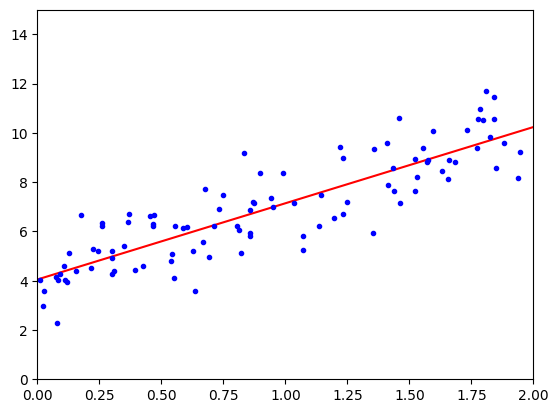

In [198]:
plt.plot(x_new,y_predict,'r-')
plt.plot(x,y,'b.')
plt.axis([0,2,0,15])
plt.show()

In [199]:
theta_best_svd, residuls, rank,s=np.linalg.lstsq(x_b,y,rcond=1e-6)
theta_best_svd

array([[4.0492457 ],
       [3.09365159]])

In [200]:
np.linalg.pinv(x_b).dot(y)

array([[4.0492457 ],
       [3.09365159]])

In [201]:
eta=0.1
n_iterations=1000
m=100
theta=np.random.randn(2,1)
for iteration in range(n_iterations):
    gradients=2/m*x_b.T.dot(x_b.dot(theta)-y)
    theta=theta-eta*gradients
theta

array([[4.0492457 ],
       [3.09365159]])

In [202]:
n_epochs=50
t0,t1=5,50
def learning_schedule(t):
  return t0/(t+t1)
theta=np.random.randn(2,1)
for epoch in range(n_epochs):
  for i in range(m):
    random_index=np.random.randint(m)
    xi=x_b[random_index:random_index+1]
    yi=y[random_index:random_index+1]
    gradients=2*xi.T.dot(xi.dot(theta)-yi)
    eta=learning_schedule(epoch*m+i)
    theta=theta-eta*gradients
theta

array([[4.05338066],
       [3.0962402 ]])

In [203]:
from sklearn.linear_model import SGDRegressor
sgd_reg=SGDRegressor(max_iter=50,tol=1e-3,penalty=None,eta0=0.1)
sgd_reg.fit(x,y.ravel())
sgd_reg.intercept_,sgd_reg.coef_

(array([4.06476329]), array([3.09992276]))

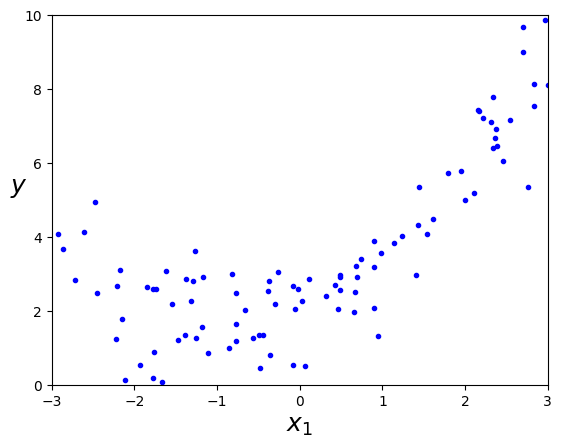

In [204]:
import matplotlib.pyplot as plt
m=100
x=6* np.random.rand(m,1)-3
y=0.5*x**2+x+2+np.random.randn(m,1)
plt.plot(x,y,'b.')
plt.xlabel('$x_1$',fontsize=18)
plt.ylabel('$y$',rotation=0,fontsize=18)
plt.axis([-3,3,0,10])
plt.show()

In [205]:
from sklearn.preprocessing import PolynomialFeatures
poly_features=PolynomialFeatures(degree=2, include_bias=False)
x_poly=poly_features.fit_transform(x)
x[0]

array([-1.26841133])

In [206]:
x_poly[0]

array([-1.26841133,  1.6088673 ])

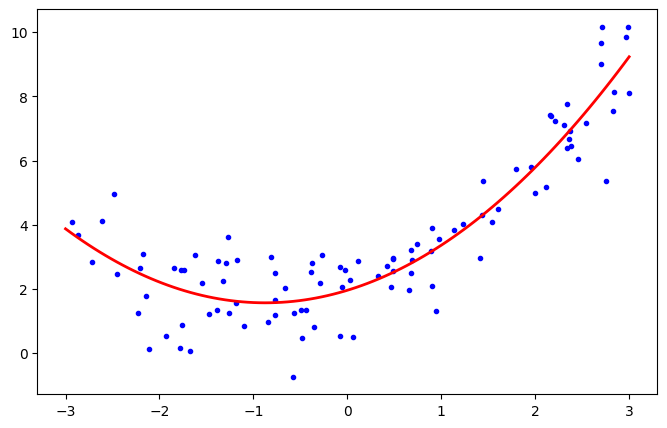

In [207]:
from sklearn.linear_model import LinearRegression
lin_reg=LinearRegression()
lin_reg.fit(x_poly,y)
lin_reg.intercept_, lin_reg.coef_
X_new = np.linspace(-3, 3, 100).reshape(-1, 1)
X_new_poly = poly_features.transform(X_new)
y_new = lin_reg.predict(X_new_poly)
plt.figure(figsize=(8, 5))
plt.plot(x, y, "b.", label="Training data")  # Original data points
plt.plot(X_new, y_new, "r-", linewidth=2, label="Predictions")

In [208]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
def plot_learning_curves(model, x, y):
  x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)
  train_errors, test_errors = [], []
  for m in range(1, len(x_train)):
    model.fit(x_train[:m], y_train[:m])
    y_train_predict = model.predict(x_train[:m])
    y_test_predict = model.predict(x_test)
    train_errors.append(mean_squared_error(y_train[:m], y_train_predict))
    test_errors.append(mean_squared_error(y_test, y_test_predict))
  plt.plot(np.sqrt(train_errors), "r-+", linewidth=2, label="Training set")
  plt.plot(np.sqrt(test_errors), "b-", linewidth=3, label="Test set")
  plt.legend()

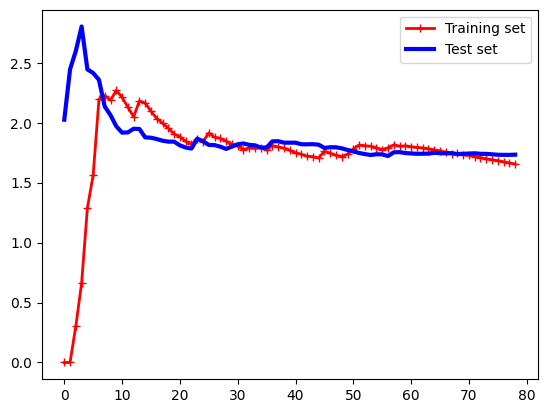

In [209]:
lin_reg=LinearRegression()
plot_learning_curves(lin_reg,x,y)

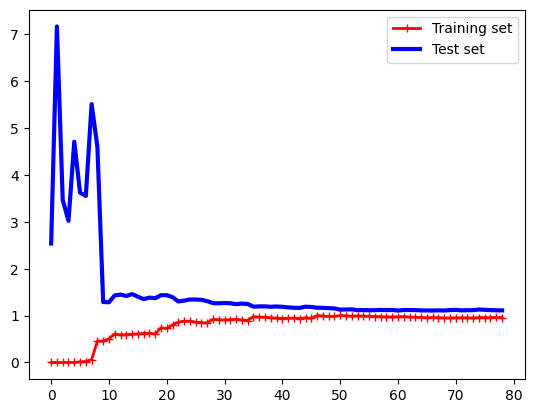

In [218]:
from sklearn.pipeline import Pipeline
polynomial_regression=Pipeline([
    ('poly_features',PolynomialFeatures(degree=4,include_bias=False)),
    ('lin_reg',LinearRegression()),
])
plot_learning_curves(polynomial_regression,x,y)